In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint
from keras.utils import load_img, img_to_array
from keras.layers import Conv2D, Flatten, Dense,MaxPool2D
import numpy as np
from keras.preprocessing import image
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
%matplotlib inline
import dlib
from PIL import Image

In [2]:
training = r'C:\Users\itars\M Pr\archive\real_vs_fake\real-vs-fake\train'
valid = r'C:\Users\itars\M Pr\archive\real_vs_fake\real-vs-fake\valid'
test = r'C:\Users\itars\M Pr\archive\real_vs_fake\real-vs-fake\test'

In [3]:
image_gen = ImageDataGenerator(rescale=1./255.)
batch_size = 64
train_flow = image_gen.flow_from_directory(
    training,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary'
)
valid_flow = image_gen.flow_from_directory(
    valid,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary'
)

Found 100010 images belonging to 2 classes.
Found 20010 images belonging to 2 classes.


In [4]:
cnn = tf.keras.models.Sequential()

In [5]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[224, 224, 3]))

In [6]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [8]:
cnn.add(tf.keras.layers.Flatten())

In [9]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [10]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [11]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [12]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [13]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 93312)             0         
                                                                 
 dense (Dense)               (None, 128)               1

In [14]:
opt = tf.keras.optimizers.RMSprop(
        learning_rate=0.0001,
        momentum=0.01)

In [15]:
cnn.compile(optimizer = opt , loss = 'binary_crossentropy', metrics = ['accuracy'])

In [16]:
checkpoint = ModelCheckpoint('weights.h5', save_weights_only=True)

In [17]:
history = None

In [18]:
cnn.load_weights('weights.h5')

In [19]:
train_steps = 400//batch_size
valid_steps = 50//batch_size
history = cnn.fit_generator(
    train_flow,
    epochs=5,
    steps_per_epoch = train_steps,
    validation_data = valid_flow,
    validation_steps = valid_steps,
    callbacks=[checkpoint]
)

C:\Users\itars\AppData\Local\Temp\ipykernel_26748\3939809314.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = cnn.fit_generator(


Epoch 1/5
6/6 [==============================] - 16s 2s/step - loss: 0.1965 - accuracy: 0.9115
Epoch 2/5
6/6 [==============================] - 12s 2s/step - loss: 0.0731 - accuracy: 0.9844
Epoch 3/5
6/6 [==============================] - 12s 2s/step - loss: 0.0744 - accuracy: 0.9792
Epoch 4/5
6/6 [==============================] - 12s 2s/step - loss: 0.0794 - accuracy: 0.9661
Epoch 5/5
6/6 [==============================] - 12s 2s/step - loss: 0.0894 - accuracy: 0.9740


In [19]:
train_steps = 40000//batch_size
valid_steps = 5000//batch_size
history = cnn.fit_generator(
    train_flow,
    epochs=15,
    steps_per_epoch = train_steps,
    validation_data = valid_flow,
    validation_steps = valid_steps,
    callbacks=[checkpoint]
)

C:\Users\itars\AppData\Local\Temp\ipykernel_20868\2188059181.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = cnn.fit_generator(


Epoch 1/15
625/625 [==============================] - 1459s 2s/step - loss: 0.2362 - accuracy: 0.9057 - val_loss: 0.2244 - val_accuracy: 0.9125
Epoch 2/15
625/625 [==============================] - 1404s 2s/step - loss: 0.1878 - accuracy: 0.9269 - val_loss: 0.2245 - val_accuracy: 0.9052
Epoch 3/15
625/625 [==============================] - 1322s 2s/step - loss: 0.1525 - accuracy: 0.9430 - val_loss: 0.1776 - val_accuracy: 0.9291
Epoch 4/15
625/625 [==============================] - 1348s 2s/step - loss: 0.1229 - accuracy: 0.9543 - val_loss: 0.1821 - val_accuracy: 0.9275
Epoch 5/15
625/625 [==============================] - 1369s 2s/step - loss: 0.1018 - accuracy: 0.9635 - val_loss: 0.1873 - val_accuracy: 0.9273
Epoch 6/15
625/625 [==============================] - 1344s 2s/step - loss: 0.0769 - accuracy: 0.9725 - val_loss: 0.1448 - val_accuracy: 0.9475
Epoch 7/15
625/625 [==============================] - 1338s 2s/step - loss: 0.0607 - accuracy: 0.9791 - val_loss: 0.1428 - val_accuracy:

In [20]:
latest_epoch_accuracy = history.history['accuracy'][-1]

In [21]:
print("Accuracy of the latest epoch:", latest_epoch_accuracy)

Accuracy of the latest epoch: 0.9739583134651184


In [22]:
image_gen = ImageDataGenerator(rescale=1./255.)
test_flow = image_gen.flow_from_directory(
    test,
    target_size=(224, 224),
    batch_size=1,
    shuffle=False,
    class_mode='binary'
)

Found 20006 images belonging to 2 classes.


In [29]:
results = cnn.evaluate(test_flow)

20006/20006 [==============================] - 320s 16ms/step - loss: 0.1748 - accuracy: 0.9328


In [30]:
# Load the pre-trained HOG + Linear SVM model for human detection
detector = dlib.get_frontal_face_detector()

In [31]:
from keras.utils import load_img, img_to_array
def ImagePrediction(loc):
    test_image = load_img(loc, target_size=(224, 224))
    plt.axis('off')
    plt.imshow(test_image)
    test_image = img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis=0)
    result = cnn.predict(test_image)
    train_flow.class_indices
    if result[0][0] == 1:
        predictions = 'Real'
    else:
        predictions = 'Fake'
    print('Prediction:', predictions)

In [32]:
# Check if the image contains a human
def is_human(img):
    img = dlib.load_rgb_image(img)
    dets = detector(img)
    return len(dets) > 0

In [ ]:
# Get the image location from the user
img = input("Enter the location of the image to predict: ")

# Check if the image contains a human
contains_human = is_human(img)

# Print the result
if contains_human:
    print("The image contains a human.")
    # Call the ImagePrediction function
    ImagePrediction(img)
else:
    print("The image does not contain a human.")

Enter the location of the image to predict: C:\Users\itars\Downloads\Test images\0A05HOR94C.jpg
The image contains a human.
1/1 [==============================] - 0s 236ms/step
Prediction: Fake


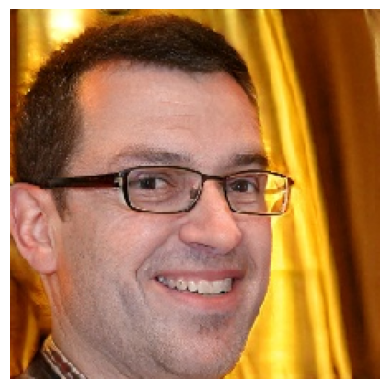

In [28]:
# Get the image location from the user
img = input("Enter the location of the image to predict: ")

# Check if the image contains a human
contains_human = is_human(img)

# Print the result
if contains_human:
    print("The image contains a human.")
    # Call the ImagePrediction function
    ImagePrediction(img)
else:
    print("The image does not contain a human.")